In [187]:
import networkx as nx
import numpy as np
import pandas as pd
import datacleaning
import itertools
from nltk.probability import FreqDist
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
import random
from pprint import pprint




In [2]:
def do_centrality(G: nx.Graph):
    deg = pd.DataFrame(nx.degree_centrality(G).items(), columns=['Id', 'degree_centrality'])
    eig = pd.DataFrame(nx.eigenvector_centrality_numpy(G, weight="Weight").items(), columns=['Id', 'eigenvector_centrality'])
    merged = pd.merge(deg, eig, on = "Id")
    # close = pd.DataFrame(nx.closeness_centrality(G).items(), columns=['Id', 'closeness_centrality']) # takes more than an hour
    # eig = pd.merge(deg, close, on = "Id")
    return merged

data = pd.read_csv("data_small.csv")
data = data.rename(columns={"Unnamed: 0":"Id"})

In [3]:
instruction_graph = nx.read_gexf("recipe_instruction_small.gexf")
ingredient_graph = nx.read_gexf("recipe_ingredient_small.gexf")

In [4]:

instruction_graph_CCs = nx.connected_components(instruction_graph)

instruction_graph_CCs_subgraphs = [instruction_graph.subgraph(c).copy() for c in instruction_graph_CCs]


lens = [len(g) for g in instruction_graph_CCs_subgraphs]
s, count = np.unique(np.sort(lens), return_counts=True)
print(s)


instruction_graph_CCs = sorted(nx.connected_components(instruction_graph), key=len, reverse=True)

instruction_graph_largest_CC = instruction_graph.subgraph(instruction_graph_CCs[0])

[   1    2    3 4799]


In [5]:
ingredient_graph_CCs = nx.connected_components(ingredient_graph)

ingredient_graph_CCs_subgraphs = [ingredient_graph.subgraph(c).copy() for c in ingredient_graph_CCs]


lens = [len(g) for g in ingredient_graph_CCs_subgraphs]
s, count = np.unique(np.sort(lens), return_counts=True)
print(s)


ingredient_graph_CCs = sorted(nx.connected_components(ingredient_graph), key=len, reverse=True)

ingredient_graph_largest_CC = ingredient_graph.subgraph(ingredient_graph_CCs[0])

[   1    2    3 4794]


In [6]:
data_instruction_centralities = pd.merge(do_centrality(instruction_graph_largest_CC), data)
data_ingredient_centralities = pd.merge(do_centrality(ingredient_graph_largest_CC), data)


In [7]:
data_instruction_centralities.sort_values(by = "eigenvector_centrality", ascending=False)

,Id,degree_centrality,eigenvector_centrality,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
1075,Bp8g2s3Ki0yxGkT8XFNPc.BKJt/KbVO,0.208420,5.477561e-02,Creamy Chicken and Broccoli Casserole,"1 (16 ounce) package rotini pasta, uncooked AD...",Bring a large pot of lightly salted water to a...,yhqUiCk.TUdAsKBmH.wfGqYrgvpplbW,ounce package rotini pasta uncooked tables...,bring a large pot of lightly salted water to a...,bring a large pot of lightly salted water a bo...,"['package', 'rotini', 'pasta', 'uncooked', 'bu...","['bring', 'large', 'pot', 'lightly', 'salted',...",Bp8g2s3Ki0yxGkT8XFNPc.BKJt/KbVO
4717,O.HBaJ9715/EEl2S.uvHFpj5Hug3jsq,0.201542,5.468268e-02,Jota (Bean and Sauerkraut Soup),10 ounces dried cranberry beans ADVERTISEMENT ...,Place the cranberry beans into a large contain...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,ounces dried cranberry beans pound pork sho...,place the cranberry beans into a large contain...,place the into a large container cover with se...,"['ounces', 'dried', 'cranberry', 'beans', 'por...","['place', 'large', 'container', 'cover', 'seve...",O.HBaJ9715/EEl2S.uvHFpj5Hug3jsq
4614,WaTBd9K1j.3RkJuRZjJjroNR0AZFKGi,0.200917,5.395371e-02,Estofado de Rabo de Toro (Spanish Oxtail Stew),"5 tablespoons olive oil, divided, or more as n...",Heat 3 tablespoons olive oil in a Dutch oven o...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,tablespoons olive oil divided or more as need...,heat tablespoons olive oil in a dutch oven ov...,heat in a dutch oven over mediumhigh heat brow...,"['olive', 'oil', 'divided', 'needed', 'beef', ...","['heat', 'dutch', 'oven', 'mediumhigh', 'heat'...",WaTBd9K1j.3RkJuRZjJjroNR0AZFKGi
534,D2hXGd421cwAtNlKUQ86fuc8hSSUFuC,0.193414,5.378442e-02,Delicious Spinach Rice with Feta,2 1/4 cups water ADVERTISEMENT 1 1/2 cups long...,Bring water and rice to a boil in a saucepan. ...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cups water cups longgrain white rice ta...,bring water and rice to a boil in a saucepan r...,bring a boil in a saucepan reduce heat mediuml...,"['water', 'longgrain', 'white', 'rice', 'olive...","['bring', 'boil', 'saucepan', 'reduce', 'heat'...",D2hXGd421cwAtNlKUQ86fuc8hSSUFuC
1011,K9y0mdnjAqnacik1pstXTrP/NGAtQBO,0.191330,5.345249e-02,Spicy and Creamy Vegetable Soup,1 tablespoon olive oil ADVERTISEMENT 1/2 white...,Heat 1 tablespoon olive oil in a large pot ove...,O3phrWDMzQFZfxkpDUscrNVII08cH1G,tablespoon olive oil white onion chopped ...,heat tablespoon olive oil in a large pot over...,heat in a pot over medium heat cook stir until...,"['olive', 'oil', 'white', 'onion', 'chopped', ...","['heat', 'pot', 'medium', 'heat', 'cook', 'sti...",K9y0mdnjAqnacik1pstXTrP/NGAtQBO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,vAOBl2uDJMudhmGx9xBk5s0Xi74EOEC,0.000208,1.947640e-13,Homemade Honey Peanut Butter,1 1/2 cups roasted unsalted peanuts ADVERTISEM...,Combine peanuts and honey in a food processor;...,EuuTeMNYI4mwhOSBvQh55TpjltgqFV.,cups roasted unsalted peanuts tablespoons ...,combine peanuts and honey in a food processor ...,combine and in a food processor process until ...,"['roasted', 'unsalted', 'peanuts', 'honey']","['combine', 'food', 'processor', 'process', 'c...",vAOBl2uDJMudhmGx9xBk5s0Xi74EOEC
425,7xtn8IZxo5.rejh5Nq5bkGOH/sg0Dje,0.000208,9.736890e-14,A Potato Salad Sandwich,1 hamburger bun ADVERTISEMENT 1 1/2 tablespoon...,Open bun and spread each side with mayonnaise....,CUCGTScujeKOuN2BVUEqtHQTlbYyghK,hamburger bun tablespoons mayonnaise lea...,open bun and spread each side with mayonnaise ...,open and spread each side with place and on bo...,"['hamburger', 'bun', 'mayonnaise', 'leaves', '...","['open', 'spread', 'side', 'place', 'bottom', ...",7xtn8IZxo5.rejh5Nq5bkGOH/sg0Dje
876,Qofd8UwmKDVnGTAndJRpsL5eEatSP1.,0.000417,7.421513e-14,Kid Friendly Fondue,"2 cups fresh blueberries, raspberries and/or b...",Place ingredients in small separate containers...,tkOYMgKHUZTP/D0mi6pwR/5F9Eml4eW,c

In [8]:
data_ingredient_centralities.sort_values(by = "eigenvector_centrality", ascending=False)

,Id,degree_centrality,eigenvector_centrality,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
388,us79pWbQkannZMlUdpxJyhg3.hxsSeS,0.135406,7.407833e-02,Blueberry Coffee Cake I,1 cup packed brown sugar ADVERTISEMENT 2/3 cup...,Heat oven to 350 degrees F (175 degrees C). Co...,.sycaiuSlPujj5Bmezb1W3Ld0PGeV/u,cup packed brown sugar cup allpurpose flour...,heat oven to degrees f degrees c coat a bund...,heat oven to degrees f degrees c coat a bundt ...,"['packed', 'brown', 'sugar', 'allpurpose', 'fl...","['heat', 'oven', 'degrees', 'degrees', 'coat',...",us79pWbQkannZMlUdpxJyhg3.hxsSeS
100,9OMxs.iBBr1Quxb4odoRASv.cmxndGG,0.130816,7.373155e-02,Honey's Butter Cake,2 1/2 cups all-purpose flour ADVERTISEMENT 1 t...,Preheat oven to 325 degrees F (165 degrees C)....,xgPej3TZDbSJi8g9cfRYIXhaD4vrmNi,cups allpurpose flour teaspoon baking powd...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['allpurpose', 'flour', 'baking', 'powder', 'b...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",9OMxs.iBBr1Quxb4odoRASv.cmxndGG
269,UxpOTenDP2ohz10AFKIA.1XXWkwZdyK,0.136240,7.345219e-02,Mrs. Sigg's Snickerdoodles,"1/2 cup butter, softened ADVERTISEMENT 1/2 cup...",Preheat oven to 400 degrees F (200 degrees C)....,3FkBLTjVQFwQEU46DtI8/j9MROUq27e,cup butter softened cup shortening cups ...,preheat oven to degrees f degrees c cream to...,preheat oven to degrees f degrees c together t...,"['butter', 'softened', 'shortening', 'white', ...","['preheat', 'oven', 'degrees', 'degrees', 'tog...",UxpOTenDP2ohz10AFKIA.1XXWkwZdyK
148,YxC.rYu4FeA1tGXTjg3CiyuB0J8EbiC,0.129773,7.256171e-02,Cinnamon Hazelnut Biscotti,3/4 cup butter ADVERTISEMENT 1 cup white sugar...,Preheat oven to 350 degrees F(175 degrees C). ...,k/kC.3eVoapEYNE1Ghc56Q3hEpCi6ae,cup butter cup white sugar eggs teaspo...,preheat oven to degrees f degrees c grease a ...,preheat oven to degrees f degrees c grease a c...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",YxC.rYu4FeA1tGXTjg3CiyuB0J8EbiC
275,w0a0ema6YOZoPnLCrV/VsI50orE64Um,0.124348,7.212902e-02,Blueberry Buttermilk Coffeecake,1/2 cup butter ADVERTISEMENT 1 1/3 cups white ...,Preheat oven to 350 degrees F (175 degrees C)....,umdzOTWkbd.SfMrLmPoiWBi7OHAImPu,cup butter cups white sugar eggs teasp...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",w0a0ema6YOZoPnLCrV/VsI50orE64Um
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4721,N5P2azG3NqyJJ7Y3hjjqBWKHgemfHgW,0.000209,7.739675e-12,Beet and Berry Smoothie,"1 cup fresh spinach ADVERTISEMENT 1 beet, peel...","Blend spinach, beet, yogurt, raspberries, blue...",wO5vMEKGONUrdIF0tSDaeSIPEtozGCK,cup fresh spinach beet peeled and cut into ...,blend spinach beet yogurt raspberries blueberr...,blend together in a blender until smooth,"['fresh', 'spinach', 'beet', 'peeled', 'cut', ...","['blend', 'together', 'blender', 'smooth']",N5P2azG3NqyJJ7Y3hjjqBWKHgemfHgW
3933,pCKyOYnO6OYhdhXR.4QsBc1e1coNsuW,0.000209,5.323100e-12,Caesar Salad Bites,"2 heads romaine lettuce, ribs removed ADVERTIS...",Arrange romaine leaves onto a serving platter....,kHGzoIvWHGmWo5tEondekvooMhS2XG.,heads romaine lettuce ribs removed cup caes...,arrange romaine leaves onto a serving platter ...,arrange leaves onto a serving platter drizzle ...,"['heads', 'romaine', 'lettuce', 'ribs', 'remov...","['arrange', 'leaves', 'onto', 'serving', 'plat...",pCKyOYnO6OYhdhXR.4QsBc1e1coNsuW
3934,UVluusYLXYuC3coSXkZDuzvjJQOP5Da,0.000209,5.323100e-12,Fisherman's Quick Fish,4 (6 ounce) fillets cod ADVERTISEMENT 1 cup cr...,Preheat oven to 500 degrees F (260 degrees C)....,gNK2W83nOMJVylaBD0q3kWM.4bjAz4a,ounce fillets cod cup creamy italianstyle ...,preheat oven to degrees f degrees c 

In [9]:
d = {b:c['weight'] for a,b,c in ingredient_graph_largest_CC.edges('5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO', data=True)}
d = pd.DataFrame(pd.Series(d), columns=["weight"]).reset_index().rename(columns={"index": "Id"})
d.set_index('Id').join(data.set_index('Id')).sort_values(by = "weight", ascending=False)

,weight,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
Id,,,,,,,,,,,
MxrOg0jqhPDRA.JyUtqN7D8AzwDkP9W,0.845154,Mom's Chocolate Cake,2 cups white sugar ADVERTISEMENT 1/2 cup short...,Preheat oven to 350 degrees F (175 degrees C)....,hO5RyM05wwo57jFouPX8P.Wrzo.ZefC,cups white sugar cup shortening eggs cu...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['white', 'sugar', 'shortening', 'eggs', 'unsw...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",MxrOg0jqhPDRA.JyUtqN7D8AzwDkP9W
yDyvibYQpOrFD.gtrwqgbGNwDkCbDce,0.839146,Roll About Sugar Cookies,1 1/2 cups white sugar ADVERTISEMENT 1 cup but...,Preheat oven to 350 degrees F (180 degrees C)....,sVXF9WvdnomR1cGE2LeThOd4ytvME86,cups white sugar cup butter flavored short...,preheat oven to degrees f degrees c cream to...,preheat oven to degrees f degrees c cream toge...,"['white', 'sugar', 'butter', 'flavored', 'shor...","['preheat', 'oven', 'degrees', 'degrees', 'cre...",yDyvibYQpOrFD.gtrwqgbGNwDkCbDce
sk3cxEE/DBZYelSb0TlkNLyFUaG6IKq,0.831567,World's Best Maine Whoopie Pies - Ayuh,1/2 cup vegetable shortening ADVERTISEMENT 2 c...,Preheat oven to 375 degrees F (190 degrees C)....,f/lMZxOPx3KA0zLkiFMP4GAfsaNxqSm,cup vegetable shortening cups milk cups w...,preheat oven to degrees f degrees c cut and ...,preheat oven to degrees f degrees c cut and se...,"['vegetable', 'shortening', 'milk', 'white', '...","['preheat', 'oven', 'degrees', 'degrees', 'cut...",sk3cxEE/DBZYelSb0TlkNLyFUaG6IKq
mWFUm.rybDWXkGH8E.d3D08CpXImN16,0.819892,Happy Birthday Cake,1 cup butter ADVERTISEMENT 2 cups white sugar ...,Preheat oven to 350 degrees F (175 degrees C)....,YiaVWPnVK8DyF5.KV1DKTcbLYbqGy1W,cup butter cups white sugar teaspoon vani...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'vanilla', 'extra...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",mWFUm.rybDWXkGH8E.d3D08CpXImN16
uabxx6C.QV1EVAZqWI/1x5ovZMM59hO,0.799456,Healthier Best Brownies,1/4 cup butter ADVERTISEMENT 1/2 cup white sug...,Preheat oven to 350 degrees F (175 degrees C)....,UcIkRevtVEMosLDSDjDaDOWra01xwMi,cup butter cup white sugar eggs cup app...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'applesau...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",uabxx6C.QV1EVAZqWI/1x5ovZMM59hO
...,...,...,...,...,...,...,...,...,...,...,...
Na7e9MzutlpRicA6uEDi15EBiJwXw8G,0.500979,Auntie Mae's Irish Bread,3 cups all-purpose flour ADVERTISEMENT 1 1/4 c...,Preheat oven to 350 degrees F (175 degrees C)....,UN1FlJE30oUTixlRE/vItHdp7xl3sRu,cups allpurpose flour cups milk or more as...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease an ...,"['allpurpose', 'flour', 'milk', 'needed', 'rai...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",Na7e9MzutlpRicA6uEDi15EBiJwXw8G
d/8M/cJzegvVjSWVp7Q.ZVZIzRzga7e,0.500979,Great-Grandmother Steinbeck's Johnnycake (Corn...,1 cup all-purpose flour ADVERTISEMENT 1/2 cup ...,Preheat the oven to 400 degrees F (200 degrees...,z3WX3ygXyDZ94GJqp6bDFh6DkqZW.9q,cup allpurpose flour cup white cornmeal c...,preheat the oven to degrees f degrees c grea...,preheat the oven to degrees f degrees c grease...,"['allpurpose', 'flour', 'white', 'cornmeal', '...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",d/8M/cJzegvVjSWVp7Q.ZVZIzRzga7e
VQSAnONv.e9pI5uSuKnNeKyRyllFKEK,0.500979,Poppy Seed French Toast,3 tablespoons poppy seeds ADVERTISEMENT 3 eggs...,In a small mixing bowl whisk together the popp...,X/B80Mv/4YpwVN2W8wQ0XmchD5eJxWm,tablespoons poppy seeds eggs cups milk ...,in a small mixing bowl whisk together the popp...,in a small mixing bowl whisk together the and ...,"['poppy', 'seeds', 'eggs', 'milk', 'vanilla', ...","['small', 'mixing', 'bo

In [10]:
d = {b:c['weight'] for a,b,c in instruction_graph_largest_CC.edges('5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO', data=True)}
d = pd.DataFrame(pd.Series(d), columns=["weight"]).reset_index().rename(columns={"index": "Id"})
d.set_index('Id').join(data.set_index('Id')).sort_values(by = "weight", ascending=False)

,weight,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
Id,,,,,,,,,,,
WPIBK.zCMtomTe4JVnBcdFDOCfryhly,0.862304,Best Moist Chocolate Cake,1 cup margarine ADVERTISEMENT 1 3/4 cups white...,Preheat oven to 350 degrees F (175 degrees C)....,zIzjTO9ZhAoOgqLKMHeUIJPOr3L5gR.,cup margarine cups white sugar eggs t...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['margarine', 'white', 'sugar', 'eggs', 'vanil...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",WPIBK.zCMtomTe4JVnBcdFDOCfryhly
2elIkaNi3ZPdQyVRSA3/fgXvzHEy81W,0.847964,Glazed Almond Bundt Cake,"1 cup butter, softened ADVERTISEMENT 2 cups wh...",Preheat oven to 350 degrees F (175 degrees C)....,zuIkCyK92NKMkyQXZ/Ja7FYHYZvTgfO,cup butter softened cups white sugar eggs...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'softened', 'white', 'sugar', 'eggs...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",2elIkaNi3ZPdQyVRSA3/fgXvzHEy81W
rCkys6pNvJ9Vun6xGsqdET23yPe.u.O,0.832672,No Fail Pound Cake,1/2 cup butter ADVERTISEMENT 1 cup white sugar...,Preheat oven to 350 degrees F (175 degrees C)....,CP9FpFh1wBnKDaL25CnsNIuXLsQD5Cu,cup butter cup white sugar eggs teaspoo...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",rCkys6pNvJ9Vun6xGsqdET23yPe.u.O
EGixKQjX8nIzxFmTABcDNn50Si7qvyy,0.819533,Carrot Pineapple Cake II,2 1/2 cups all-purpose flour ADVERTISEMENT 2 t...,Preheat oven to 350 degrees F (175 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cups allpurpose flour teaspoons baking sod...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['allpurpose', 'flour', 'baking', 'soda', 'bak...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",EGixKQjX8nIzxFmTABcDNn50Si7qvyy
w0a0ema6YOZoPnLCrV/VsI50orE64Um,0.804815,Blueberry Buttermilk Coffeecake,1/2 cup butter ADVERTISEMENT 1 1/3 cups white ...,Preheat oven to 350 degrees F (175 degrees C)....,umdzOTWkbd.SfMrLmPoiWBi7OHAImPu,cup butter cups white sugar eggs teasp...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",w0a0ema6YOZoPnLCrV/VsI50orE64Um
...,...,...,...,...,...,...,...,...,...,...,...
9w2.D/ItEdrXUjTGj2F53hH7kDhn/Bq,0.502519,Pudding with Cornflakes,4 1/2 cups whole milk ADVERTISEMENT 4 1/2 cups...,Preheat oven to 350 degrees F (175 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cups whole milk cups cornflakes cereal ...,preheat oven to degrees f degrees c in a lar...,preheat oven to degrees f degrees c in a large...,"['whole', 'milk', 'cornflakes', 'cereal', 'bro...","['preheat', 'oven', 'degrees', 'degrees', 'lar...",9w2.D/ItEdrXUjTGj2F53hH7kDhn/Bq
us79pWbQkannZMlUdpxJyhg3.hxsSeS,0.502440,Blueberry Coffee Cake I,1 cup packed brown sugar ADVERTISEMENT 2/3 cup...,Heat oven to 350 degrees F (175 degrees C). Co...,.sycaiuSlPujj5Bmezb1W3Ld0PGeV/u,cup packed brown sugar cup allpurpose flour...,heat oven to degrees f degrees c coat a bund...,heat oven to degrees f degrees c coat a bundt ...,"['packed', 'brown', 'sugar', 'allpurpose', 'fl...","['heat', 'oven', 'degrees', 'degrees', 'coat',...",us79pWbQkannZMlUdpxJyhg3.hxsSeS
irMARr.cE0Ef7ds.qoNGb.7.CtpBLaq,0.500939,"Banana Peanut Butter Cheesecake aka ""The Elvis""",1 cup graham cracker crumbs ADVERTISEMENT 3 ta...,Preheat oven to 350 degrees F (175 degrees C)....,4WDkSfGJawpadxIJTxnyQb8.3uM7nFG,cup graham cracker crumbs tablespoons butte...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease an ...,"['graham', 'cracker', 'crumbs', 'butter', 'mel...","['preheat', 'oven', 'degre

In [11]:
commonnodes = set(instruction_graph_largest_CC).intersection(set(ingredient_graph_largest_CC))
instruction_graph_comparable = nx.induced_subgraph(instruction_graph_largest_CC, commonnodes)
ingredient_graph_comparable = nx.induced_subgraph(ingredient_graph_largest_CC, commonnodes)
len(ingredient_graph_comparable.nodes) == len(instruction_graph_comparable.nodes) == 4609

False

In [12]:
instruction_communities = nx.community.louvain_communities(instruction_graph_comparable, resolution=0.5,seed=2024)
ingredient_communities = nx.community.louvain_communities(ingredient_graph_comparable, resolution=0.5,seed=2024)

In [13]:
data

,Id,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
0,5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO,Southern-Style Chocolate Pound Cake,1 cup butter ADVERTISEMENT 1/2 cup shortening ...,Preheat oven to 350 degrees F (175 degrees C)....,v.IiJhm4GZSZAGtMDWpTfAe6vspLCiu,cup butter cup shortening cups white suga...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'shortening', 'white', 'sugar', 'eg...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO
1,DIzfv.NycIqtwo58y7fteog1dKRw12O,Pumpkin Pie I,1 egg ADVERTISEMENT 1 tablespoon all-purpose f...,Preheat oven to 450 degrees F (230 degrees C)....,EbVR3lftwDSDeE1MRSGdi1evygKF/D6,egg tablespoon allpurpose flour cup white...,preheat oven to degrees f degrees c add the ...,preheat oven to degrees f degrees c add the gr...,"['egg', 'allpurpose', 'flour', 'white', 'sugar...","['preheat', 'oven', 'degrees', 'degrees', 'add...",DIzfv.NycIqtwo58y7fteog1dKRw12O
2,TFxp0RPK/1PxAnjYiZUS0KztkgYb3iW,Cinnamon Oatmeal Zucchini Cookies,"1 1/2 cups butter, softened ADVERTISEMENT 1 1/...",Preheat oven to 350 degrees F (175 degrees C)....,jG7CnWbsc8cYsoHbreIorq8Uvyzzk/6,cups butter softened cups white sugar e...,preheat oven to degrees f degrees c grease b...,preheat oven to degrees f degrees c grease she...,"['butter', 'softened', 'white', 'sugar', 'eggs...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",TFxp0RPK/1PxAnjYiZUS0KztkgYb3iW
3,3yH5Jc6HLmEnJw5ggLqI11oeBiSpwBy,Plum-Oat Drop Biscuits,2 tablespoons white sugar ADVERTISEMENT 1/2 te...,Preheat oven to 450 degrees F (230 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,tablespoons white sugar teaspoon ground cin...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease a s...,"['white', 'sugar', 'ground', 'cinnamon', 'allp...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",3yH5Jc6HLmEnJw5ggLqI11oeBiSpwBy
4,8lZak.EVdLP9/dukyN72DYHyjseFwV2,Ghirardelli Milk Chocolate Chip Cookies,2 1/4 cups all-purpose flour ADVERTISEMENT 1 t...,Preheat the oven to 375 degrees F. Stir togeth...,50UyVqBQayirbQ47M.8oJvkETheUGFW,cups allpurpose flour teaspoon baking soda...,preheat the oven to degrees f stir together t...,preheat the oven to degrees f stir together th...,"['allpurpose', 'flour', 'baking', 'soda', 'sal...","['preheat', 'oven', 'degrees', 'stir', 'togeth...",8lZak.EVdLP9/dukyN72DYHyjseFwV2
...,...,...,...,...,...,...,...,...,...,...,...
4995,z5ZKH66nGOR2cgkzDl5vGj4DPX/J95O,Sun-Dried Tomato With Fresh Basil Spread,1/2 cup oil-packed sun-dried tomatoes ADVERTIS...,Place sun-dried tomatoes in the work bowl of a...,IV7I3CRDxEMTrdHzOCE3YHxewYs0JQW,cup oilpacked sundried tomatoes cup basil l...,place sundried tomatoes in the work bowl of a ...,place in the work bowl of a food processor pul...,"['oilpacked', 'sundried', 'tomatoes', 'basil',...","['place', 'work', 'bowl', 'food', 'processor',...",z5ZKH66nGOR2cgkzDl5vGj4DPX/J95O
4996,g1mQzPtIoBSaOaaHSkMj7cObWt0r5.K,Banana Split Martini,ice as needed ADVERTISEMENT 2 fluid ounces whi...,Fill a cocktail shaker with ice; add white cho...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,ice as needed fluid ounces white chocolate l...,fill a cocktail shaker with ice add white choc...,fill a cocktail shaker with add creme de and c...,"['ice', 'needed', 'fluid', 'ounces', 'white', ...","['fill', 'cocktail', 'shaker', 'add', 'creme',...",g1mQzPtIoBSaOaaHSkMj7cObWt0r5.K
4997,dsDOddsQtDp7xomWY2mQwcoTyLeUfYa,Citrus Glazed Banana Squash,"1 1/2 pounds banana squash, peeled and cubed A...",Melt butter in a large skillet over medium hea...,SkAAXlzdZZcQ6UmAO72KI82FiqpAG9y,pounds banana squash peeled and cubed cup ...,melt butter in a large skillet over medium hea...,melt in a large skillet over medium heat add c...,"['banana', 'squash', 'peeled', 'cubed', 'butte...","['melt', 'large', 'skillet', 'medium', 'heat',...",dsDOddsQ

In [14]:
datacleaning.data_for_nodes(ingredient_communities[0])

,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
Id,,,,,,,,,,
b.o1b7wKcxX7m4R5EvkvfICMOZLtCuK,Strawberry-Mango Pie,"2 mangos - peeled, seeded, and cubed ADVERTISE...",Preheat oven to 375 degrees F (190 degrees C)....,hkJvfXm9TfTnbrQ1BKcd4NaLqnVsiHK,mangos peeled seeded and cubed cup apple j...,preheat oven to degrees f degrees c place a ...,preheat oven to degrees f degrees c place a mi...,"[mangos, peeled, seeded, cubed, apple, juice, ...","[preheat, oven, degrees, degrees, place, mixin...",b.o1b7wKcxX7m4R5EvkvfICMOZLtCuK
YcueIjD7X4pC.Nu4eqH1LhO66ZaVGDW,Pineapple Scones,2 cups all-purpose flour ADVERTISEMENT 1 table...,Preheat oven to 375 degrees F (190 degrees C)....,JgeTNnbUPmR3Hxcs92KYyTdalBSwXO2,cups allpurpose flour tablespoon baking pow...,preheat oven to degrees f degrees c in a med...,preheat oven to degrees f degrees c in a mediu...,"[allpurpose, flour, baking, powder, salt, butt...","[preheat, oven, degrees, degrees, medium, bowl...",YcueIjD7X4pC.Nu4eqH1LhO66ZaVGDW
PFJHbYiY4sHHS5jFmwgIR.0yECyePQS,Very Dairy Strawberry Shortcake Dip,1/2 cup heavy cream ADVERTISEMENT 1 (3 ounce) ...,Beat heavy cream in a large bowl with an elect...,BKJxHBFJcdQ3Pu8EONB5.982PyG4Gb2,cup heavy cream ounce package cream cheese...,beat heavy cream in a large bowl with an elect...,beat in a large bowl with an electric mixer un...,"[heavy, cream, package, cream, cheese, softene...","[beat, large, bowl, electric, mixer, stiff, pe...",PFJHbYiY4sHHS5jFmwgIR.0yECyePQS
vCYFZch/BqLRtkc2.I028s52Siec.gy,Ginger Cookies from Stevia In The Raw®,2 cups all-purpose flour ADVERTISEMENT 3/4 tea...,"Preheat oven to 350 degrees F.\nCombine flour,...",xgSioMKmMhJdPclyaNZ2g1JQDpMGrj.,cups allpurpose flour teaspoon baking soda ...,preheat oven to degrees f combine flour bakin...,preheat oven to degrees f combine and a medium...,"[allpurpose, flour, baking, soda, salt, ground...","[preheat, oven, degrees, combine, medium, bowl...",vCYFZch/BqLRtkc2.I028s52Siec.gy
dnPiG2l/FqdUgicdZLMcHSvx1.QfLxa,Giant Chocolate Chip Cookie Cake,cooking spray ADVERTISEMENT 2 1/4 cups all-pur...,Preheat oven to 350 degrees F (175 degrees C)....,Eocl6PQcBqyrZ.xZIf1dTGabwqralZu,cooking spray cups allpurpose flour teasp...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease a i...,"[cooking, spray, allpurpose, flour, baking, so...","[preheat, oven, degrees, degrees, grease, spri...",dnPiG2l/FqdUgicdZLMcHSvx1.QfLxa
...,...,...,...,...,...,...,...,...,...,...
ZXfA.LNJyz3rgs.3pIIlk2pEK/8dlCm,Zucchini Cornbread,1 cup coarsely chopped zucchini ADVERTISEMENT ...,Preheat oven to 400 degrees F (200 degrees C)....,AygYCUEIG054.qI/VSDuXkjFxr7Ou1a,cup coarsely chopped zucchini cup milk cu...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease a i...,"[coarsely, chopped, zucchini, milk, chopped, o...","[preheat, oven, degrees, degrees, grease, cast...",ZXfA.LNJyz3rgs.3pIIlk2pEK/8dlCm
G0CBjlPMMgkXviLlcTw69tR7YU83x8u,Apple Strudel Dessert,2 (8 ounce) packages refrigerated crescent rol...,Preheat oven to 325 degrees F (165 degrees C)....,Ubh8ZxOLUuNU7oaUtQT46aqWAXrlEfC,ounce packages refrigerated crescent roll do...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease a i...,"[packages, refrigerated, crescent, roll, dough...","[preheat, oven, degrees, degrees, grease, roun...",G0CBjlPMMgkXviLlcTw69tR7YU83x8u
OnTwYiVTpNCrcxbSTLIT6tKmi1HSpHS,Powdered Sugar Cookies III,1 cup butter flavored shortening ADVERTISEMENT...,"Mix together the shortening, egg, and confecti...",OcV0g.Bx3q/joQ0snywUCDE7JnIIzfG,cup butter flavored shortening egg cup co...,mix together the shortening egg and confection...,mix together the and stir in and mix well roll...,"[butter, flavored, shortening, egg, confection...","[mix, together, stir, mix, well, roll, dough, ...",OnTwYiVTpNCrcxbSTLIT6tKmi1HSpHS


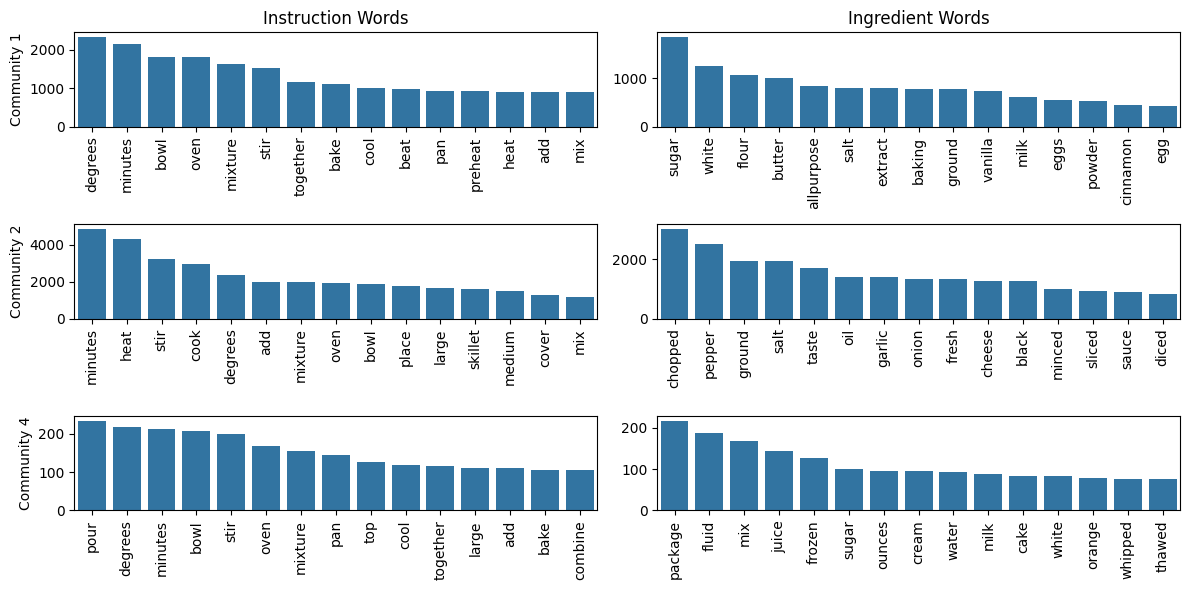

In [141]:
fig, ax = plt.subplots(3,2, figsize= (12,6))
com = 0
i = 0
for community in ingredient_communities:
    com = com + 1
    if len(community) < 100:
        continue
    community_data = datacleaning.data_for_nodes(community)
    ingredient_words = list(itertools.chain.from_iterable(community_data["ingredient_words"]))
    instruction_words = list(itertools.chain.from_iterable(community_data["instruction_words"]))
    instruction_freqs = pd.DataFrame(sorted(FreqDist(instruction_words).most_common(15), key=lambda x: x[1], reverse=True))
    ingredient_freqs = pd.DataFrame(sorted(FreqDist(ingredient_words).most_common(15), key=lambda x: x[1], reverse=True))
    sns.barplot(x=instruction_freqs[0], y=instruction_freqs[1], ax= ax[i,0])
    ax[i,0].tick_params('x', labelrotation=90)
    ax[i,0].set_ylabel("Community " + str(com))
    ax[i,0].set_xlabel("")
    sns.barplot(x=ingredient_freqs[0], y=ingredient_freqs[1], ax= ax[i,1])
    ax[i,1].tick_params('x', labelrotation=90)
    ax[i,1].set_ylabel("")
    ax[i,1].set_xlabel("")
    i = i+1

ax[0,1].set_title("Ingredient Words")
ax[0,0].set_title("Instruction Words")
fig.tight_layout()
plt.show()

# Rotate x-axis labels for better readability


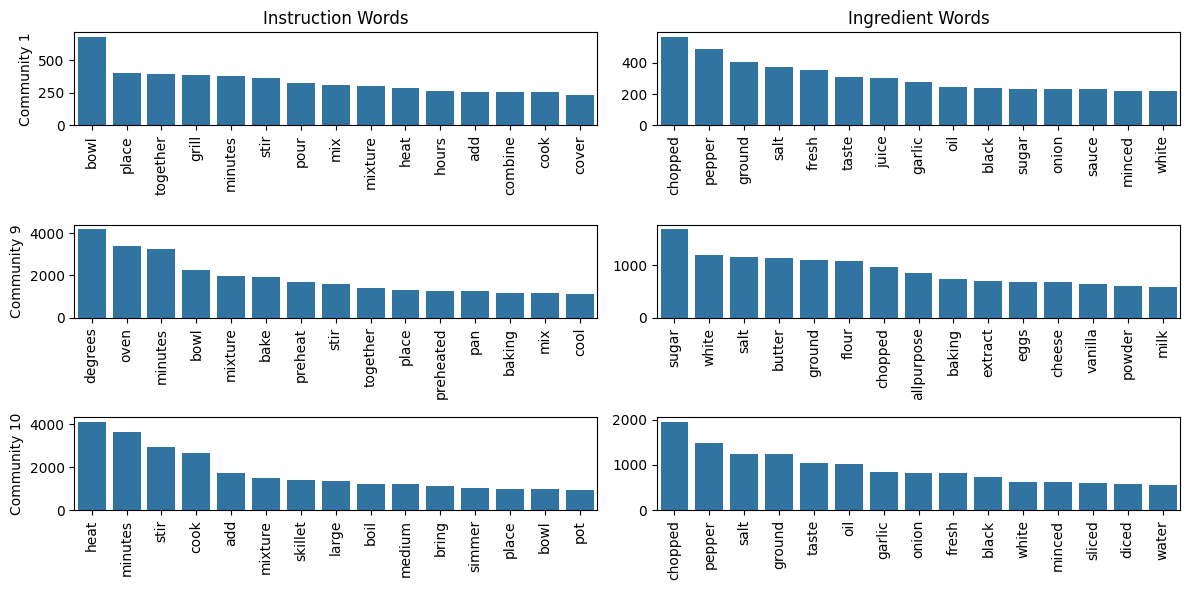

In [142]:
fig, ax = plt.subplots(3,2, figsize= (12,6))
com = 0
i = 0
for community in instruction_communities:
    com = com + 1
    if len(community) < 100:
        continue
    community_data = datacleaning.data_for_nodes(community)
    ingredient_words = list(itertools.chain.from_iterable(community_data["ingredient_words"]))
    instruction_words = list(itertools.chain.from_iterable(community_data["instruction_words"]))
    instruction_freqs = pd.DataFrame(sorted(FreqDist(instruction_words).most_common(15), key=lambda x: x[1], reverse=True))
    ingredient_freqs = pd.DataFrame(sorted(FreqDist(ingredient_words).most_common(15), key=lambda x: x[1], reverse=True))
    sns.barplot(x=instruction_freqs[0], y=instruction_freqs[1], ax= ax[i,0])
    ax[i,0].tick_params('x', labelrotation=90)
    ax[i,0].set_ylabel("Community " + str(com))
    ax[i,0].set_xlabel("")
    sns.barplot(x=ingredient_freqs[0], y=ingredient_freqs[1], ax= ax[i,1])
    ax[i,1].tick_params('x', labelrotation=90)
    ax[i,1].set_ylabel("")
    ax[i,1].set_xlabel("")
    i = i+1

ax[0,1].set_title("Ingredient Words")
ax[0,0].set_title("Instruction Words")
fig.tight_layout()
plt.show()

In [147]:
ingredient_communities_sets = dict()

for i, community in enumerate(ingredient_communities):
    if len(community) > 100:
        ingredient_communities_sets["Community " + str(i+1)] = set(community)


instruction_communities_sets = dict()

for i, community in enumerate(instruction_communities):
    if len(community) > 100:
        instruction_communities_sets["Community " + str(i+1)] = set(community)

In [189]:
def sample_community(community: set):
    sample = random.sample(list(community), 5)
    sample = pd.Series(sample)
    return np.ravel([data[data.Id == i].title for i in sample])

# sample_community(ingredient_communities_sets["Community 1"])
print(*sample_community(ingredient_communities_sets["Community 2"]),sep='\n')
# sample_community(ingredient_communities_sets["Community 4"])

Grilled Sausages with Caramelized Onions and Apples
Fried Polenta Squares with Creamy Mushroom Ragu
Curried Pork Burgers
Alaine's Blue Cheese Dressing
Jimmy Dean Hearty Sausage Mini Quiches


Text(0.5, 1.0, 'Overlap Coefficient for Detected Communities')

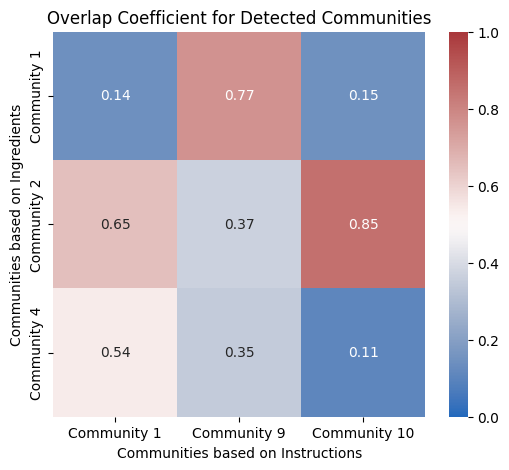

In [149]:
fig, ax = plt.subplots(1,1,figsize= (6,5))
A = {}
for icom in instruction_communities_sets:
    for jcom in ingredient_communities_sets:
        intersection = len(ingredient_communities_sets[jcom].intersection(instruction_communities_sets[icom]))
        minimum = min(len(ingredient_communities_sets[jcom]),len(instruction_communities_sets[icom]))
        A[icom] = A.get(icom, {})
        A[icom][jcom] = intersection/minimum


sns.heatmap(pd.DataFrame(A), annot=True, vmax=1, vmin=0, cmap="vlag", ax=ax)
ax.set_xlabel("Communities based on Instructions")
ax.set_ylabel("Communities based on Ingredients")
ax.set_title("Overlap Coefficient for Detected Communities")


In [197]:
i = 1
instruction_com = {}
for com in instruction_communities:
    instruction_com.update({recipe:i for recipe in com})
    i = i+1

instruction_com

i = 1
ingredient_com = {}
for com in ingredient_communities:
    ingredient_com.update({recipe:i for recipe in com})
    i = i+1

nx.set_node_attributes(instruction_graph_comparable, instruction_com, "instruction_com")
nx.set_node_attributes(instruction_graph_comparable, ingredient_com, "ingredient_com")

nx.set_node_attributes(ingredient_graph_comparable, instruction_com, "instruction_com")
nx.set_node_attributes(ingredient_graph_comparable, ingredient_com, "ingredient_com")

In [204]:
# fix titles
titles = data.set_index('Id')['title'].to_dict()

nx.set_node_attributes(ingredient_graph_comparable, titles, "title")
nx.set_node_attributes(instruction_graph_comparable, titles, "title")

In [205]:
nx.write_gexf(ingredient_graph_comparable, "ingredient_graph_comparable.gexf")

In [206]:
nx.write_gexf(instruction_graph_comparable, "instruction_graph_comparable.gexf")